In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
%matplotlib inline

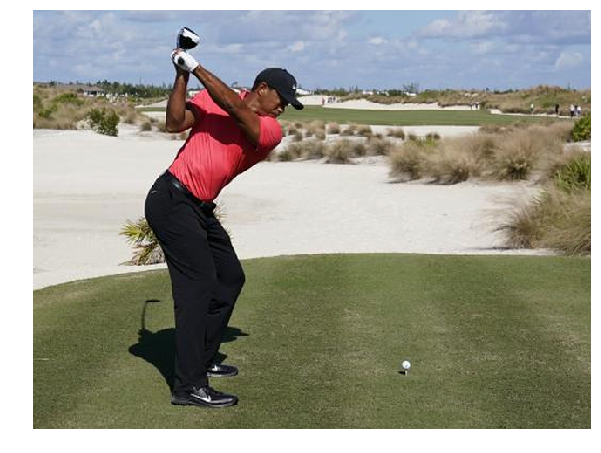

In [2]:
img = cv2.imread("Tiger_Woods.png")

img_width = img.shape[1]
img_height = img.shape[0]

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img[:,:,::-1]);

In [14]:
help(mp)

Help on package mediapipe:

NAME
    mediapipe - Copyright 2019 - 2020 The MediaPipe Authors.

DESCRIPTION
    Licensed under the Apache License, Version 2.0 (the "License");
    you may not use this file except in compliance with the License.
    You may obtain a copy of the License at
    
         http://www.apache.org/licenses/LICENSE-2.0
    
    Unless required by applicable law or agreed to in writing, software
    distributed under the License is distributed on an "AS IS" BASIS,
    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    See the License for the specific language governing permissions and
    limitations under the License.

PACKAGE CONTENTS
    calculators (package)
    examples (package)
    framework (package)
    gpu (package)
    modules (package)
    python (package)
    util (package)

SUBMODULES
    packet_creator
    packet_getter
    resource_util
    solutions

FILE
    c:\users\sp.000\anaconda3\lib\site-packages\mediapipe\__init__

In [15]:
help(mp.solutions)

Help on package mediapipe.python.solutions in mediapipe.python:

NAME
    mediapipe.python.solutions - MediaPipe Solutions Python API.

PACKAGE CONTENTS
    drawing_utils
    drawing_utils_test
    face_detection
    face_detection_test
    face_mesh
    face_mesh_test
    hands
    hands_test
    holistic
    holistic_test
    objectron
    objectron_test
    pose
    pose_test

FILE
    c:\users\sp.000\anaconda3\lib\site-packages\mediapipe\python\solutions\__init__.py




In [16]:
help(mp.solutions.pose)

Help on module mediapipe.python.solutions.pose in mediapipe.python.solutions:

NAME
    mediapipe.python.solutions.pose - MediaPipe Pose.

CLASSES
    enum.IntEnum(builtins.int, enum.Enum)
        PoseLandmark
    mediapipe.python.solution_base.SolutionBase(builtins.object)
        Pose
    
    class Pose(mediapipe.python.solution_base.SolutionBase)
     |  MediaPipe Pose.
     |  
     |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
     |  prominent person detected.
     |  
     |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
     |  usage examples.
     |  
     |  Method resolution order:
     |      Pose
     |      mediapipe.python.solution_base.SolutionBase
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, static_image_mode=False, upper_body_only=False, smooth_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
     |      Initializes a MediaP

In [17]:
help(results)

Help on class SolutionOutputs in module mediapipe.python.solution_base:

class SolutionOutputs(builtins.tuple)
 |  SolutionOutputs(pose_landmarks,)
 |  
 |  Method resolution order:
 |      SolutionOutputs
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |      Return self as a plain tuple.  Used by copy and pickle.
 |  
 |  __repr__(self)
 |      Return a nicely formatted representation string
 |  
 |  _asdict(self)
 |      Return a new OrderedDict which maps field names to their values.
 |  
 |  _replace(_self, **kwds)
 |      Return a new SolutionOutputs object replacing specified fields with new values
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  _make(iterable, new=<built-in method __new__ of type object at 0x000000006B14C0D0>, len=<built-in function len>) from builtins.type
 |      Make a new SolutionOutputs object from a sequence or iterable
 | 

In [20]:
results.pose_landmarks.landmark[mp.solutions.pose.PoseLandmark.RIGHT_SHOULDER]

x: 0.3847685
y: 0.22860184
z: -0.07581834
visibility: 0.9999726

In [3]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

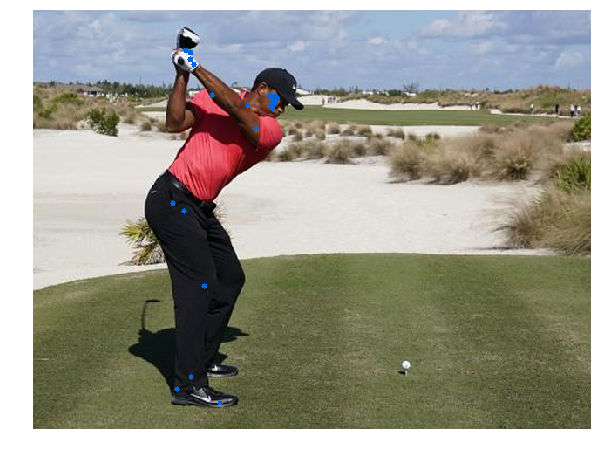

In [10]:
with mp_pose.Pose(static_image_mode = True) as pose:
    annotated_img = img.copy()
    results = pose.process(img)
    circle_radius = int(.007*img_height)
    point_spec = mp_drawing.DrawingSpec(color=(220,100,0), thickness=-1, circle_radius=circle_radius)
    mp_drawing.draw_landmarks(annotated_img, landmark_list=results.pose_landmarks, landmark_drawing_spec=point_spec)
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(annotated_img[:,:,::-1]);

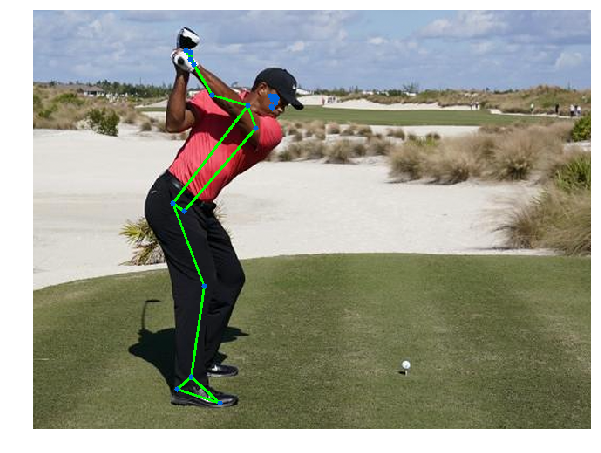

In [13]:
line_spec = mp_drawing.DrawingSpec(color=(0,255,0),thickness=2)
mp_drawing.draw_landmarks(annotated_img,landmark_list=results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS,landmark_drawing_spec=point_spec,connection_drawing_spec=line_spec)
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(annotated_img[:,:,::-1]);